## Sales Store Prediction

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### Checking missing values

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [8]:
df["Item_Weight"]=df['Item_Weight'].fillna(df["Item_Weight"].mean())

In [9]:
## Filling the missing values in Outlet_Size with mode
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
## Filling the missing values in Item_Outlet_Sales with mean
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean())

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Check Duplicates

In [11]:
df.duplicated().sum()

0

#### Check Data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [14]:
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 765.9+ KB


#### Droping unneccessory columns from dataframe

<Axes: >

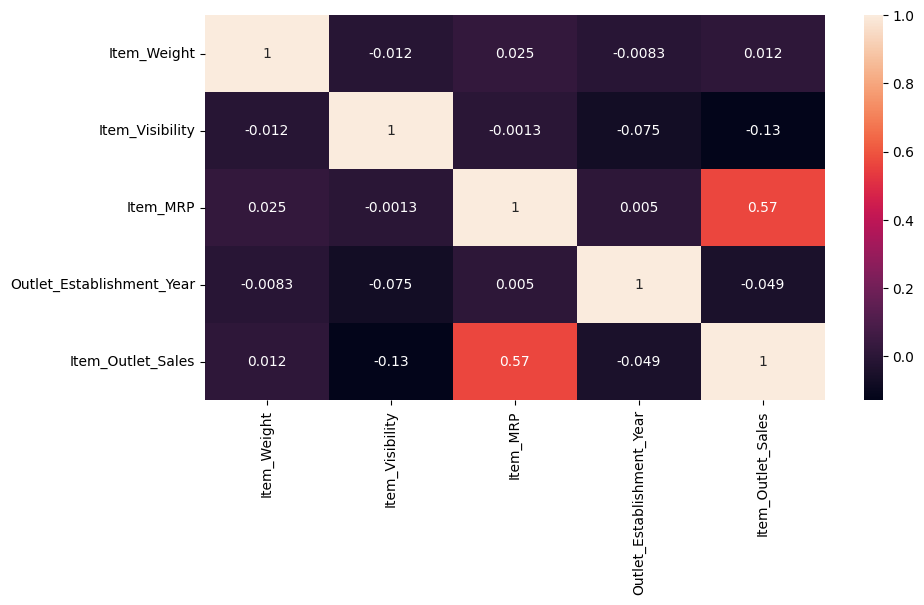

In [16]:
## make corr graph
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)

from above heatmap we come to conclusion we will drop the Item_Identifier,Item_weight, Item_Visibility & Outlet_Establishment_Year

In [17]:
df.drop(["Item_Identifier","Item_Visibility","Outlet_Establishment_Year","Item_Weight"],axis=1,inplace=True)

In [18]:
df.head(1)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735


### Checking the number of unique values of each column

In [19]:
df.nunique()

Item_Fat_Content           5
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3120
dtype: int64

In [20]:
df.head(1)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735


### Correcting data

In [21]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [22]:
df["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [23]:
# In this we will apply OneHotEncoder
df["Item_Fat_Content"].value_counts() 


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [24]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})
df["Item_Fat_Content"].value_counts() 

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [25]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [26]:
df["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [27]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [28]:
print("Categories in 'Outlet_Size' variable:     ",end=" " )
print(df['Outlet_Size'].unique())

print("Categories in 'Outlet_Identifier' variable:  ",end=" ")
print(df['Outlet_Identifier'].unique())

print("Categories in 'Item_Type' variable:",end=" " )
print(df['Item_Type'].unique())

print("Categories in 'Item_Fat_Content' variable:     ",end=" " )
print(df['Item_Fat_Content'].unique())

print("Categories in 'Outlet_Location_Type' variable:     ",end=" " )
print(df['Outlet_Location_Type'].unique())

print("Categories in 'Outlet_Type' variable:     ",end=" " )
print(df['Outlet_Type'].unique())

Categories in 'Outlet_Size' variable:      ['Medium' 'High' 'Small']
Categories in 'Outlet_Identifier' variable:   ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Categories in 'Item_Type' variable: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Categories in 'Item_Fat_Content' variable:      ['Low Fat' 'Regular']
Categories in 'Outlet_Location_Type' variable:      ['Tier 1' 'Tier 3' 'Tier 2']
Categories in 'Outlet_Type' variable:      ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


#### define numerical & categorical columns

In [29]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Item_MRP', 'Item_Outlet_Sales']

We have 6 categorical features : ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [30]:
df.to_csv('store_prediction_sales_cleaned.csv',index=False)

#### Preparing X and Y variables

In [31]:
df.head(1)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735


In [32]:
X=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]

In [33]:
X

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store
4,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2


In [34]:
y

0       3735
1        443
2       2097
3        732
4        994
        ... 
8518    2778
8519     549
8520    1193
8521    1845
8522     765
Name: Item_Outlet_Sales, Length: 8523, dtype: int32

### Create Column Transformer pipeline

In [35]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns
print(num_features)
print(cat_features)

Index(['Item_MRP'], dtype='object')
Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [36]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numeric_transformer = StandardScaler()  # StandardScaler is used to scale the numerical variables
oh_transformer=OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # OneHotEncoder is used to encode the categorical variables

preprocessor=ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ],
    remainder='passthrough'
)

In [37]:
X=preprocessor.fit_transform(X)

In [38]:
X.shape

(8523, 39)

In [39]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.747454
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.489023
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.010040
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.660050
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.399220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.180783
8519,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.527301
8520,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.897208
8521,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.607977


## Train test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_train.shape, X_test.shape

((5113, 39), (3410, 39))

In [41]:
X_train

array([[ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.90680104],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.82795003],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.57134674],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.54751937],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.37009248],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.72668629]])

#### Create an Evaluate Function to give all metrics after model Training

In [42]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [43]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1147.0395
- Mean Absolute Error: 852.5673
- R2 Score: 0.5591
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1099.9311
- Mean Absolute Error: 814.6796
- R2 Score: 0.5675


Lasso
Model performance for Training set
- Root Mean Squared Error: 1147.2179
- Mean Absolute Error: 852.2265
- R2 Score: 0.5590
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1098.9686
- Mean Absolute Error: 813.9775
- R2 Score: 0.5683


Ridge
Model performance for Training set
- Root Mean Squared Error: 1147.0402
- Mean Absolute Error: 852.5311
- R2 Score: 0.5591
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1099.8739
- Mean Absolute Error: 814.6004
- R2 Score: 0.5676


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 994.8205
- Mean Absolute Error: 700.3914
- R2 Sco

## Result

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.572391
1,Lasso,0.568295
2,Ridge,0.567583
0,Linear Regression,0.567538
5,Random Forest Regressor,0.522024
3,K-Neighbors Regressor,0.509520
8,AdaBoost Regressor,0.506977
6,XGBRegressor,0.499854
4,Decision Tree,0.172497


## Hyperparameter Tuning

In [46]:
# Initialize hyperparameter grids for different regression models



rf_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}



xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth": [3, 5, 7, 10],
    "n_estimators": [100, 200, 500, 1000],
    "colsample_bytree": [0.3, 0.7, 1.0],
    "subsample": [0.5, 0.75, 1.0]
}





elastic_params = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
}





In [47]:
randomcv_models = [
    
    ("RF", RandomForestRegressor(), rf_params),
   
   
    
    
    
]

In [48]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=50,
                                cv=3,
                                verbose=1,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 50 candidates, totalling 150 fits
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 20, 'max_features': 8, 'max_depth': 15}


In [2]:
rf=RandomForestRegressor(n_estimators=1000, min_samples_split= 8, max_features= 7, max_depth= 15)

NameError: name 'RandomForestRegressor' is not defined

In [3]:
rf.fit(X_train,y_train)

NameError: name 'rf' is not defined

In [51]:
y_train_predict=rf.predict(X_train)

In [52]:
print(r2_score(y_train,y_train_pred))

0.532872190028556
